# Simultaneous least squares fit - Yago Obispo Gerster | mn304 | yago.obispo_gerster@stud.uni-heidelberg.de

## Formulas

### Damped harmonic oscillator
Differential equation:
$$m \ddot x = -k x - \alpha \dot x$$
After dividing by $m$ one obtains
$$\ddot x + 2 \beta \dot x + \omega_0^2 x = 0; \quad \beta = \frac{\alpha}{2m}$$
In case of undercritical damping ($\beta < \omega_0$) the solution is :
$$x(t) = x_0 e^{- \beta t} \cos(\omega t + \varphi_0); \quad \omega = \sqrt{\omega_0^2 - \beta^2}$$
 
### Driven harmonic oscillator
Differential equation:
$$\ddot x + 2 \beta \dot x + \omega_0^2 x = K \cos \omega t; \quad K = \frac{f}{m}$$

Ansatz:
$$x(t) = A \cos (\omega t + \varphi) $$

Solution
$$A(\omega) = \frac{f/m}{\sqrt{(\omega^2 - \omega_0^2)^2 + 4 \beta^2 \omega^2}}$$

Phase shift between driving force and oscillator:
$$\tan \varphi = \frac{2 \beta \omega}{\omega^2 - \omega_0^2}, \quad -\pi \le \varphi \le 0$$

## Tasks

a) Fit the $x(t)$, $A(\omega)$ individually using the method of least squares

b) Fit $x(t)$ and $A(\omega)$ simultaneously. More generally, what is the reasoning behind such a combined fit?

Use the data generation provided in `S01_least_squares_02_generate_data.ipynb` and read it in as sketched below.

## Comments on Python's `iminuit`

The KIP service has iminuit version 1.3.8. Please note that the most recent version is $\geq2.0.0$ and that the [documentation](https://iminuit.readthedocs.io/en/stable/) applies to *that* version. Some backward-incompatible changes have been introduced, some of which changed some interfaces. For your tasks that mainly affects the `minuit.Minuit` constructor. The following shows the construction of a `Minuit` object for version 1.3.8 (in case you use the KIP service or a version $<2.0.0$) and $\geq2.0.0$ (in case you use another service implementing a higher version), respectively.
```python
from iminuit import Minuit

def func(par1, par2, ..., parN):
    return minimise_something(par1, par2, ..., parN)

# least squares method: errordef=1
# likelihood method: errordef=0.5
m = Minuit(func, par1=0.1, par2=0.1, ..., parN=0.1, errordef=1)
```

And this would be the equivalent workflow for versions >2.0.0
```python
from iminuit import Minuit

def func(par1, par2, ..., parN):
    return minimise_something(par1, par2, ..., parN)

# least squares method: errordef=Minuit.LEAST_SQUARES
# likelihood method: errordef=Minuit.LIKELIHOOD

# add errordef as an attribute of your defined minimisation function which will be checked for when optimised
func.errordef = Minuit.LEAST_SQUARES
m = Minuit(func, par1=0.1, par2=0.1, ..., parN=0.1)
```

Another (potenitally) Jupiter related *feature* is the fact that `m.migrad()`, `m.matrix()`, `m.minos()` etc. can yield a nice summary of the respective procedure. However, in order to show it, either of these methods (and potentially others in case you use them) have to be *the last line of a code cell*. If there is *anything* coming afterwards, the output will not be printed, hence, for anything that follows, it is recommended to start a new code cell.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from iminuit import Minuit

## Read data

In [2]:
t_data, x_data, sigma_x = np.loadtxt('damped_free_oscillator.csv', delimiter=',', unpack=True)
omega_data, A_data, sigma_A, ph_data, sigma_ph = np.loadtxt('driven_oscillator.csv', 
                                                            delimiter=',', unpack=True)

## Solution

## Excercise a: Individual fit

In the first excercise we want to fit the solution $x(t)$ of the differential equation of a damped harmonic oscillator, given by
$$x(t) = x_0 e^{- \beta t} \cos(\omega t + \varphi_0); \quad \omega = \sqrt{\omega_0^2 - \beta^2}$$
and the amplitude of the solution of the differential equation for a driven harmonic oscillator
$$A(\omega) = \frac{f/m}{\sqrt{(\omega^2 - \omega_0^2)^2 + 4 \beta^2 \omega^2}}$$
to the given dataset.

For the fit, the least squares method will be used. Therefore we proceed by first defining the fit functions $x(t)$ and $A(w)$, computing the $\chi^2$ values for each of them and then minimize $\chi^2$.
$$ \chi^2 = \sum_{i = 1}^n \dfrac{(y_i - f(x_i, \theta))^2}{\sigma_i^2} $$
As the fit is not a linear least squares fit, as the fit functions do not linearly depend on the fit parameters, we are forced to use the more general approach to minimize $\chi^2$ by using the algorithms contained in Minuit.

In [3]:
#Define Fit functions
def x(t,x_0,beta,w_0,phi_0):
    return x_0*np.exp(-beta*t)*np.cos((np.sqrt(w_0**2 -beta**2))*t + phi_0)

def A(w,fdm,w_0,beta):
    return fdm/np.sqrt((w**2-w_0**2)**2 + 4*beta**2*w**2)

#Define the chi^2 for each
def chi2_x(x_0,beta,w_0,phi_0):
    return np.sum((x_data-x(t_data,x_0,beta,w_0,phi_0))**2/sigma_x**2 )

def chi2_A(fdm,w_0,beta):
    return np.sum((A_data-A(omega_data,fdm,w_0,beta))**2/sigma_A**2 )

#Run Migrad Algorithm (Minuit) to minimize chi^2 using least squares for x(t)
chi2_x.errordef = Minuit.LEAST_SQUARES
mx = Minuit(chi2_x,x_0=0.3,beta=0,w_0=3,phi_0=0)
mx.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 30.15                      │              Nfcn = 269              │
│ EDM = 1.75e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ x_0   │  0.0979   │  0.0030   │            │            │         │         │       │
│ 1 │ beta  │   0.282   │   0.014   │            │            │         │         │       │
│ 2 │ w_0   │   4.027   │   0.014   │            │            │         │         │       │
│ 3 │ phi_0 │  -0.034   │   0.034   │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬─────────────────────────────────────────┐
│       │       x_0      beta       w_0     phi_0 │
├───────┼─────────────────────────────────────────┤
│   x_0 │  8.74e-06  2.74e-05 -1.66e-06   1.1e-05 │
│  beta │  2.74e-05  0.000182 -1.12e-07  3.68e-05 │
│   w_0 │ -1.66e-06 -1.12e-07  0.000208 -0.000363 │
│ phi_0 │   1.1e-05  3.68e-05 -0.000363   0.00118 │
└───────┴─────────────────────────────────────────┘

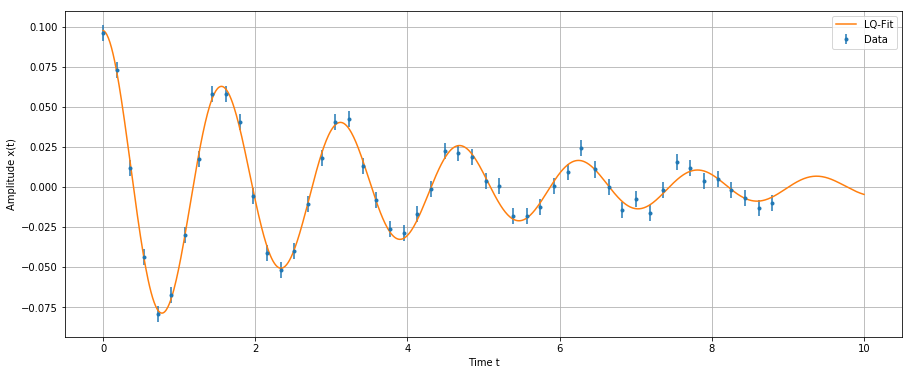

In [4]:
#Plot of fitted x(t)
td = np.linspace(0,10,1000)
plt.figure(figsize=(15,6))
plt.grid()
plt.errorbar(t_data,x_data,yerr=sigma_x,fmt=".",label="Data")
plt.plot(td,x(td,*mx.values),label="LQ-Fit")
plt.xlabel("Time t")
plt.ylabel("Amplitude x(t)")

plt.legend()

In [5]:
#Run Migrad Algorithm (Minuit) to minimize chi^2 using least squares for x(t)
chi2_A.errordef = Minuit.LEAST_SQUARES
mA = Minuit(chi2_A,fdm=0.4,w_0=4,beta=0.4)
mA.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 34.3                       │              Nfcn = 95               │
│ EDM = 6.66e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ fdm  │   0.199   │   0.005   │            │            │         │         │       │
│ 1 │ w_0  │   4.000   │   0.009   │            │            │         │         │       │
│ 2 │ beta │   0.301   │   0.012   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────┬────────────────────────────┐
│      │      fdm      w_0     beta │
├──────┼────────────────────────────┤
│  fdm │ 2.53e-05 6.13e-06 5.11e-05 │
│  w_0 │ 6.13e-06  8.5e-05 7.28e-06 │
│ beta │ 5.11e-05 7.28e-06 0.000133 │
└──────┴────────────────────────────┘

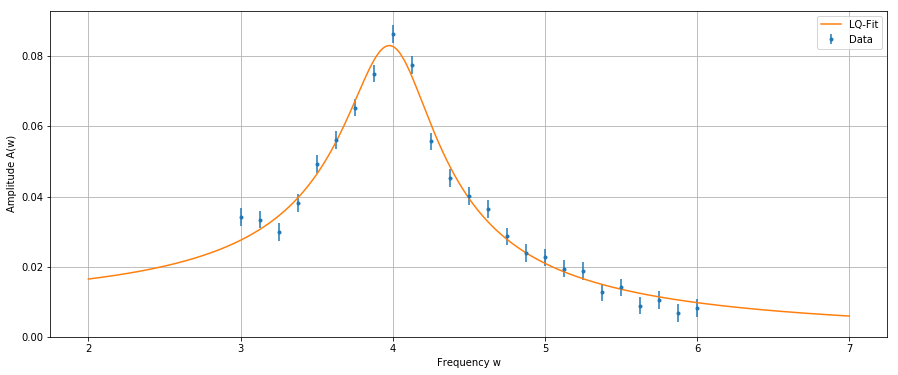

In [6]:
#Plot of fitted A(w)
wd = np.linspace(2,7,1000)
plt.figure(figsize=(15,6))
plt.grid()
plt.errorbar(omega_data,A_data,yerr=sigma_A,fmt=".",label="Data")
plt.plot(wd,A(wd,*mA.values),label="LQ-Fit")
plt.xlabel("Frequency w")
plt.ylabel("Amplitude A(w)")

plt.legend()

## Excercise b: Simulataneous fit

In the second excercise, instead of fitting $x(t)$ and $A(w)$ individually, we want to fit both combined.

The main reason for favoring this simultanous approach is, that both fit functions in part depend on the same fit parameters. Generally speaking, the approach makes sense for cases in which some of the fit parameters of both fit functions share some type of physical meaning.

In this special case, instead of computing both functions seperately and finding the (local) minima for each, we can combine them by adding the individual $\chi^2$ functions together and then minimizing the total $\chi^2$ function in order to obtain the global minimum, for which a wider range of measurements is taken into account than if the both measurement sets are only used for each sepparate fit function.

Moreover, a simultaneous fit can be used for cross-validation. If the model fits one of both but not the other, we directly know, we have to work on our model.

Therefore we mus compute
$$\chi_{total}^2 = \chi_{x(t)}^2 + \chi_{A(w)}^2$$
And minimize it with the Migrad Algorithm analogous to the procedure from before.

In [7]:
#Define chi^2 total function
def chi2_tot(x_0,beta,w_0,phi_0,fdm):
    return chi2_x(x_0,beta,w_0,phi_0)+chi2_A(fdm,w_0,beta)

#Minimize with MIGRAD
chi2_tot.errordef = Minuit.LEAST_SQUARES
mtot = Minuit(chi2_tot,x_0=0.3,beta=0.4,w_0=4,phi_0=0,fdm=0.4)
mtot.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 68.08                      │              Nfcn = 167              │
│ EDM = 8.61e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ x_0   │  0.0998   │  0.0025   │            │            │         │         │       │
│ 1 │ beta  │   0.294   │   0.009   │            │            │         │         │       │
│ 2 │ w_0   │   4.007   │   0.008   │            │            │         │         │       │
│ 3 │ phi_0 │   0.003   │   0.027   │            │            │         │         │       │
│ 4 │ fdm   │   0.197   │   0.004   │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────────────────────────────────────┐
│       │       x_0      beta       w_0     phi_0       fdm │
├───────┼───────────────────────────────────────────────────┤
│   x_0 │  6.38e-06   1.1e-05  1.85e-07   4.4e-06  4.25e-06 │
│  beta │   1.1e-05  7.58e-05  3.21e-06  6.86e-06  2.94e-05 │
│   w_0 │  1.85e-07  3.21e-06  5.96e-05 -0.000101  3.43e-06 │
│ phi_0 │   4.4e-06  6.86e-06 -0.000101  0.000711 -1.06e-06 │
│   fdm │  4.25e-06  2.94e-05  3.43e-06 -1.06e-06  1.69e-05 │
└───────┴───────────────────────────────────────────────────┘

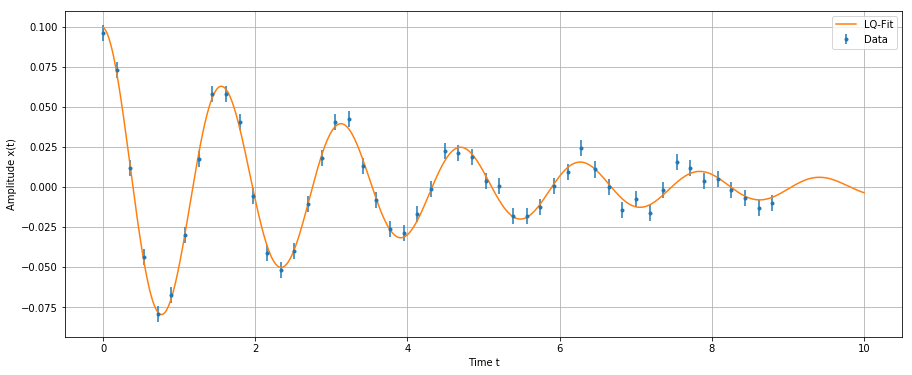

In [8]:
#Plot fitted x(t)
td = np.linspace(0,10,1000)
plt.figure(figsize=(15,6))
plt.grid()
plt.errorbar(t_data,x_data,yerr=sigma_x,fmt=".",label="Data")
plt.plot(td,x(td,mtot.values[0],mtot.values[1],mtot.values[2],mtot.values[3]),label="LQ-Fit")
plt.xlabel("Time t")
plt.ylabel("Amplitude x(t)")

plt.legend()

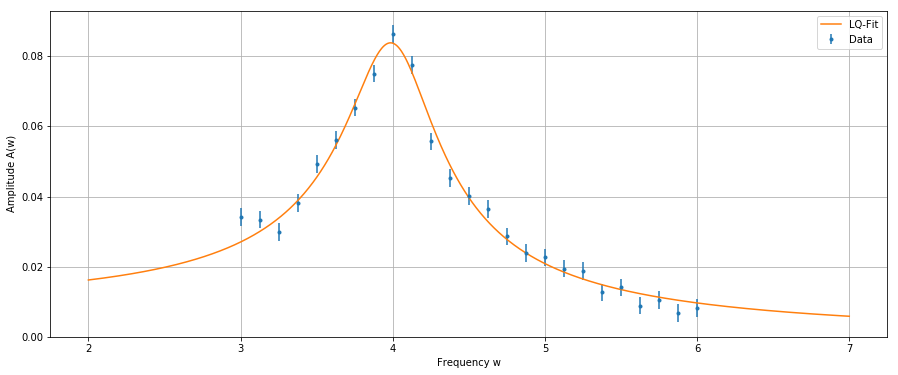

In [9]:
#Plot fitted A(w)
wd = np.linspace(2,7,1000)
plt.figure(figsize=(15,6))
plt.grid()
plt.errorbar(omega_data,A_data,yerr=sigma_A,fmt=".",label="Data")
plt.plot(wd,A(wd,mtot.values[4],mtot.values[2],mtot.values[1]),label="LQ-Fit")
plt.xlabel("Frequency w")
plt.ylabel("Amplitude A(w)")

plt.legend()

At first glance, the difference between the simultaneous and the individual fits can only hardly be seen.

From the Migrad-Algorithm results, one can observe the following:
The parameters $\beta$ and $\omega_0$ are the ones on which both functions $x(t)$ and $A(w)$ depend.
In the individual fit, we obtained $\beta = 0,282\pm 0,014$ for the $x(t)$ fit and $\beta = 0,301\pm 0,012$ for the $A(w)$ fit. The simultanous fit got us the result $\beta = 0,294\pm 0,009$. We can therefore observe, that the value of the simultaneous fit lies between the value of both individual fits and that its estimated uncertainty is also lower in the simultaneous fit.
The same statement can be made about $w_0$. For the individual fits we obtained $w_0=4,027\pm 0,014$ for $x(t)$ and $w_0=4,000\pm 0,009$ for $A(w)$. The simultanous fit gave us $w_0 = 4,007\pm 0,008$.